## Business objective:
Our recommendation system comes up with the list of candidate movies and recommends the highly-rated ones to a specific user to achieve personalization goal.


## Algorithms: 

We explored various memory and model based algorithms 

Baseline Approach 

Memory based algorithms: <br>
1) KNN Basic <br>
2) KNN with Means <br>
3) KNN with Zscore <br>
4) KNN Baseline <br>

Model based algorithms: <br>
1) NMF (Non-negative Matrix Factorization) <br>
2) SVD <br>

## Results:

### Baseline Approach:



The algorithms in this section try to minimize the following regularized squared error: <br>

$$\sum_{r_{ui} \in R_{train}} \left(r_{ui} - (\mu + b_u + b_i)\right)^2 +
\lambda \left(b_u^2 + b_i^2 \right).$$
 
b_u: the observed deviation of user u <br>
b_i: the observed deviation of item i <br>

Baselines can be estimated in the following two ways: <br>
Alternating Least Squares (ALS) <br>
The hyperparameters to be tuned are: <br>
	reg_i: the regularization parameters for items <br>
	reg_u: the regularization parameters for users <br>
	n_epochs: the number of iteration of the ALS procedure <br>

Stochastic Gradient Descent (SGD) <br>
The hyperparameters to be tuned are: <br>
	reg: the regularization parameter of the cost function that is optimized <br>
	learning_rate: the learning rate of SGD <br>
	n_epochs: the number of iteration of the SGD procedure <br>


### Baseline Results:

Code for Baseline approach can be found in "part1_baseline.ipynb"

In one of the KNN algorithms, KNNBaseline, we can take into account a baseline rating. We therefore did the grid search on baselines to find the optimal combination of hyper parameters giving the best performance and used the testing dataset to check the accuracy of our tuned model. While comparing the performance of two estimation methods, ALS and SGD, we found that the overall performance is better while using ALS (RMSE is lower), 94.33%, than using SGD, 94.41%. <br>
 
  ALS (RMSE: 94.33%) <br>
n_epochs: 20 <br>
reg_i: 1 <br>
reg_u: 5 <br>

SGD (RMSE: 94.41%) <br>
   learning_rate: 0.005 <br>
n_epochs: 50 <br>
reg: 0.02 <br>


### KNN:

We used four different variations of KNN. They are KNN Basic, KNN with Means, KNN with Z-Score, KNN Baseline.
Notation: <br>

k: The maximum number of neighbors to take into account <br>
$ N_i^k(u) $ : The set consisting of at most k neighbors of user u who have rated item i <br>
$ N_u^k(i) $ : The set consisting of at most k neighbors of item i rated by user u <br>
$ sim(u,v) $ : Similarity of user u to user v <br>
$ sim(i,j) $ : Similarity of item i to item j <br>


We used the following similarity metrics: Mean Squared Difference similarity (MSD), Cosine Similarity, Pearson Correlation Similarity, Pearson Correlation with Baseline Similarity.

Accuracy Metric used: RMSE (Root Mean Squared Error)

### i) KNN Basic: <br>
$\hat{r}_{ui}$ : Predicted rating of user u for item i <br>
User Based: <br>
$ \hat{r}_{ui} = \frac{
\sum\limits_{v \in N^k_i(u)} \text{sim}(u, v) \cdot r_{vi}}
{\sum\limits_{v \in N^k_i(u)} \text{sim}(u, v)} $ 

Item Based: <br>
$ \hat{r}_{ui} = \frac{
\sum\limits_{j \in N^k_u(i)} \text{sim}(i, j) \cdot r_{uj}}
{\sum\limits_{j \in N^k_u(j)} \text{sim}(i, j)} $

### ii) KNN with Means:
Here we take into account the mean ratings of each user and mean ratings for each item in user-based and item-based approaches respectively. <br>

User Based: <br>
$ \hat{r}_{ui} = \mu_u + \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - \mu_v)} {\sum\limits_{v \in
N^k_i(u)} \text{sim}(u, v)} $

Item Based: <br>
$ \hat{r}_{ui} = \mu_i + \frac{ \sum\limits_{j \in N^k_u(i)}
\text{sim}(i, j) \cdot (r_{uj} - \mu_j)} {\sum\limits_{j \in
N^k_u(i)} \text{sim}(i, j)} $

### iii) KNN with Z score: <br>
Here we take into account the z-score normalization of each user.

User Based: <br>
$ \hat{r}_{ui} = \mu_u + \sigma_u \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - \mu_v) / \sigma_v} {\sum\limits_{v
\in N^k_i(u)} \text{sim}(u, v)} $

Item Based: <br>
$ \hat{r}_{ui} = \mu_i + \sigma_i \frac{ \sum\limits_{j \in N^k_u(i)}
\text{sim}(i, j) \cdot (r_{uj} - \mu_j) / \sigma_j} {\sum\limits_{j
\in N^k_u(i)} \text{sim}(i, j)} $



### iv) KNN Baseline:

Here we take into account the baseline ratings. <br> 

User Based:

$ \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - b_{vi})} {\sum\limits_{v \in
N^k_i(u)} \text{sim}(u, v)} $

Item Based: 

$ \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{j \in N^k_u(i)}
\text{sim}(i, j) \cdot (r_{uj} - b_{uj})} {\sum\limits_{j \in
N^k_u(j)} \text{sim}(i, j)} $


### KNN Results:

"knn_tests_100k.py" : The source code to implement the KNN algorithms in Surprise (using 100k dataset) and run the grid search tests to find optimal hyperparameters for each algorithm. <br>

"KNNBaselineTests.py" : The source code used to analyze performance of our chosen memory-based algorithm (KNN Baseline) against larger datasets. <br>

In [10]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import csv

knn_CSVs = ["100k_KNNBasic_Results.csv", "100k_KNNWithMeans_Results.csv", 
            "100k_KNNWithZScore_Results.csv", "100k_KNNBaseline_Results.csv"]

df = pd.DataFrame()

for each_csv in knn_CSVs:
    temp_df = pd.read_csv(each_csv)
    sim_options_df = temp_df["sim_options"].apply(lambda x: pd.Series(re.split(" |,|:|}|\'", x)))
    temp_df.drop(temp_df.columns[[0, 5, 6, 7, 8]], axis=1, inplace=True)
    temp_df["similarity_metric"] = sim_options_df.iloc[0:, 5]
    temp_df["user-based?"] = sim_options_df.iloc[0:, 12]
    temp_df["algorithm"] = each_csv
    df = pd.concat([df, temp_df], ignore_index=True)

df.to_csv("100k_Results_Combined.csv")

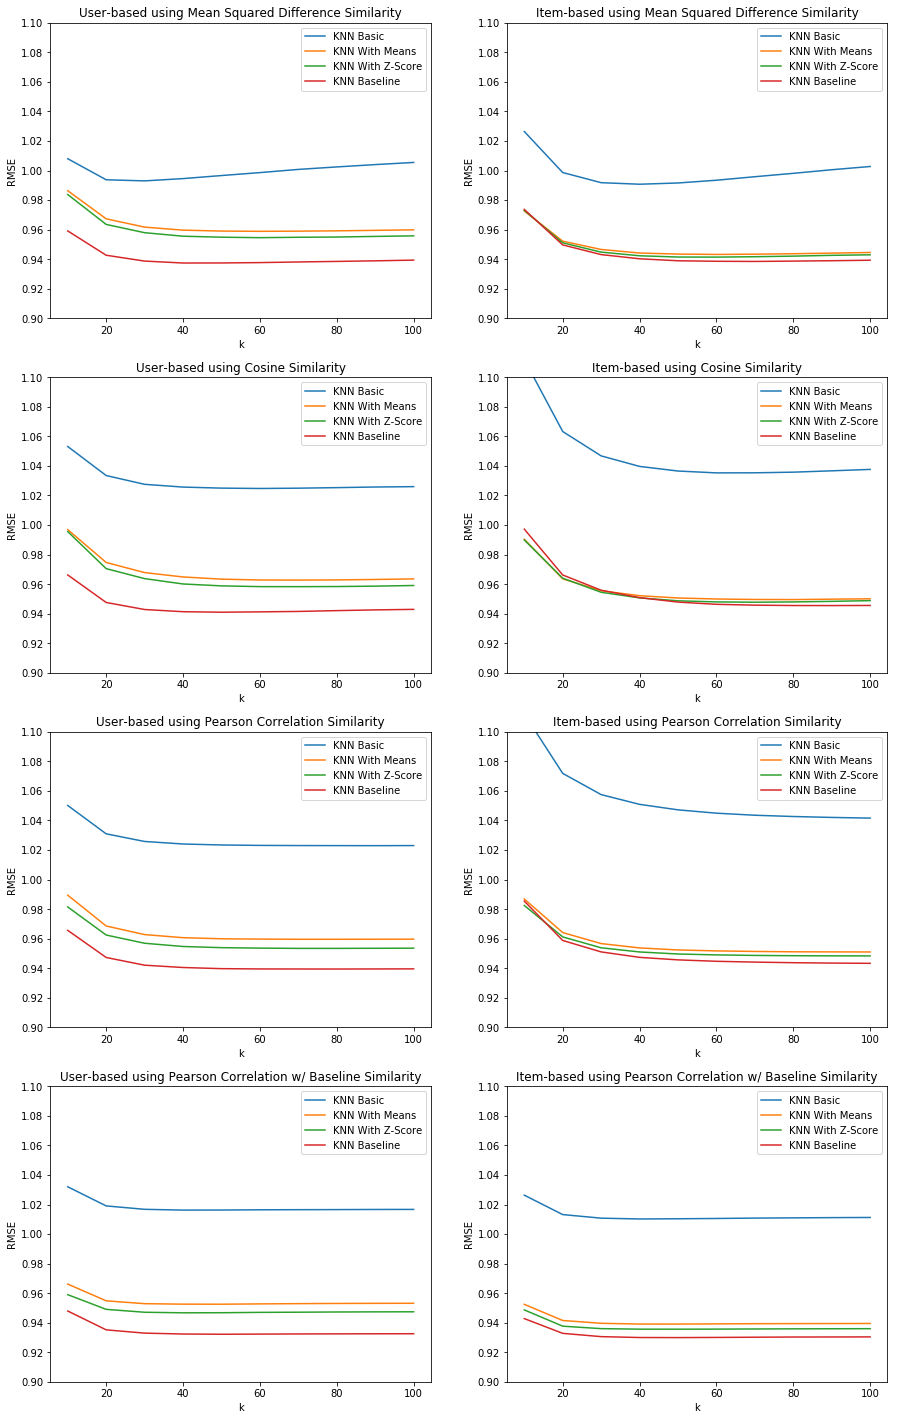

In [11]:
algorithm_dict = {"100k_KNNBasic_Results.csv": "KNN Basic", "100k_KNNWithMeans_Results.csv": "KNN With Means",
                  "100k_KNNWithZScore_Results.csv": "KNN With Z-Score", "100k_KNNBaseline_Results.csv": "KNN Baseline"}
metric_dict = {"msd": "Mean Squared Difference Similarity", "cosine": "Cosine Similarity", 
               "pearson": "Pearson Correlation Similarity", "pearson_baseline": "Pearson Correlation w/ Baseline Similarity"}
user_based_dict = {"True": "User-based", "False": "Item-based"}


def get_title(user_based, similarity_metric):
    return user_based_dict[user_based] + " using " + metric_dict[similarity_metric]

fig = plt.figure(figsize=(15,25))
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)
ax8 = fig.add_subplot(428)
subplots = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

subplot_dict = {0: ["True", "msd"], 1: ["False", "msd"],
                2: ["True", "cosine"], 3: ["False", "cosine"],
                4: ["True", "pearson"], 5: ["False", "pearson"],
                6: ["True", "pearson_baseline"], 7: ["False", "pearson_baseline"]}

error_metric = "RMSE"
for i in range(len(subplots)):
    is_user_based, similarity_metric = subplot_dict[i]
    for algorithm in knn_CSVs:
        filtered_df = df[(df["user-based?"] == is_user_based) & (df["similarity_metric"] == similarity_metric) & (df["algorithm"] == algorithm)]
        subplots[i].plot(filtered_df["k"], filtered_df[error_metric], label=algorithm_dict[algorithm])
        subplots[i].set_xlabel("k")
        subplots[i].set_ylabel(error_metric)
        subplots[i].set_title(get_title(is_user_based, similarity_metric))
        subplots[i].legend(loc="upper right")
        subplots[i].set_ylim(bottom=.9, top=1.1)
        subplots[i].set_yticks((.9, .92, .94, .96, .98, 1, 1.02, 1.04, 1.06, 1.08, 1.1))
plt.show()


The above graphs show the performance of all variations of KNN with different parameter values  over all the similarity metrics. <br>

X-axis: parameter k <br>
Y-axis: RMSE (Accuracy Metric) <br>

Observe that in our case, KNN Baseline performs the best among all the variations of KNN.


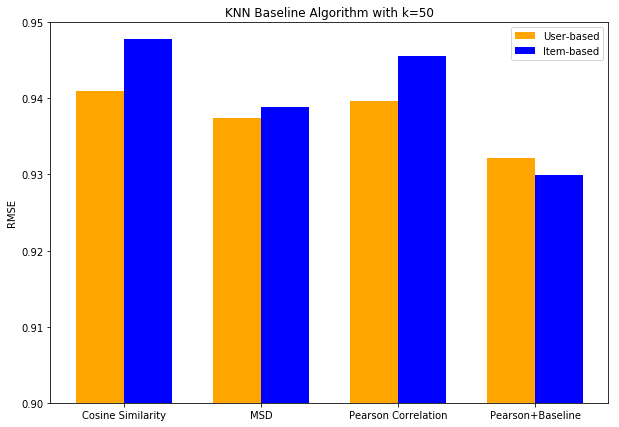

In [12]:
best_k = 50
filtered_df = df[(df["k"] == best_k) & (df["algorithm"] == "100k_KNNBaseline_Results.csv")]
best_user_based_errors = filtered_df[filtered_df["user-based?"] == "True"][error_metric]
best_item_based_errors = filtered_df[filtered_df["user-based?"] == "False"][error_metric]

num_of_sim_metric=4
bar_width = .35
ind = np.arange(num_of_sim_metric)

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
rects1 = ax.bar(ind, best_user_based_errors, bar_width, color="orange")
rects2 = ax.bar(ind+bar_width, best_item_based_errors, bar_width, color="blue")

ax.set_ylabel(error_metric)
ax.set_title("KNN Baseline Algorithm with k={}".format(best_k))
ax.set_xticks(ind + bar_width / 2)
ax.set_yticks((.9, .91, .92, .93, .94, .95))
ax.set_ylim(bottom=.9, top=.95)
ax.set_xticklabels(('Cosine Similarity', 'MSD', 'Pearson Correlation', 'Pearson+Baseline'))

ax.legend((rects1[0], rects2[0]), ('User-based', 'Item-based'))
plt.show()

The above graph shows the performance of KNN Baseline algorithm over all the similarity metrics.

X – axis: Similarity Metrics <br>
Y – axis: RMSE <br>

Observe that Person + Baseline Similarity and item based model gives the best accuracy

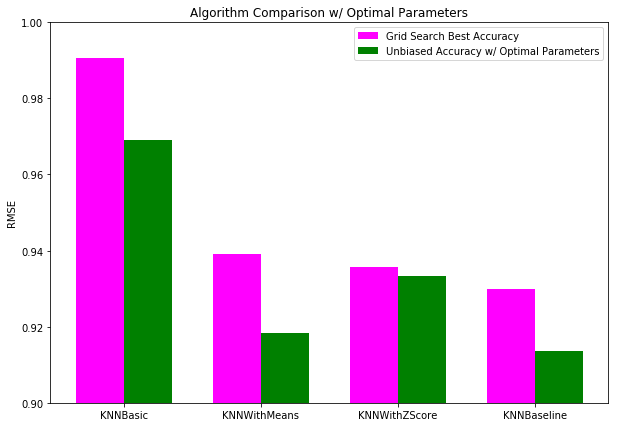

In [13]:
gridsearch_opt_accuracies = [0.990718028313, 0.939079136288, 0.935620684677, 0.929931954255]
unbiased_accuracies =[0.96899782698417969, 0.91831765436668245, 0.93329486881966095, 0.91349864307782735]

num_of_sim_metric=4
bar_width = .35
ind = np.arange(num_of_sim_metric)

fig, ax = plt.subplots()
fig.set_size_inches(10,7)
rects1 = ax.bar(ind, gridsearch_opt_accuracies, bar_width, color="magenta")
rects2 = ax.bar(ind+bar_width, unbiased_accuracies, bar_width, color="green")

ax.set_ylabel(error_metric)
ax.set_title("Algorithm Comparison w/ Optimal Parameters")
ax.set_xticks(ind + bar_width / 2)
ax.set_yticks((.9, .92, .94, .96, .98, 1))
ax.set_ylim(bottom=.9, top=1)
ax.set_xticklabels(('KNNBasic', 'KNNWithMeans', 'KNNWithZScore', 'KNNBaseline'))

ax.legend((rects1[0], rects2[0]), ('Grid Search Best Accuracy', 'Unbiased Accuracy w/ Optimal Parameters'))
plt.show()

The above graph shows the comparison of algorithms after getting their optimal hyper parameters by tuning. We divided the data set into training, validation and test sets. 20% of the data is split into test set. The remaining data is split into 5 folds and cross validation is performed. After the cross validation, we retrain the model over the 80% training set and test on the 20% unbiased set. <br>

X – axis: Algorithms <br>
Y – axis: RMSE <br>


Observe that KNN Baseline algorithm performs significantly better on the unbiased set. (the test set)

Upon tuning the hyperparameters for each variation of KNN, we got the following results. <br>

In [17]:
import tabulate
from IPython.display import HTML, display
table = [["Algorithm", "Best Parameters", "Grid Search Best Accuracy", "Unbiased Accuracy (RMSE)"],
    ["KNN Basic","Sim: MSD, item based, k = 40, min k = 5", 0.99071,0.96899],
         ["KNN with Means","Sim: Pearson Baseline, item based, k = 50, min k = 5", 0.93907,0.91831],
         ["KNN with Means","Sim: Pearson Baseline, item based, k = 50, min k = 5", 0.93562,0.93329],
         ["KNN Baseline","Sim: Pearson Baseline, item based, k = 50, min k = 5", 0.92993,0.91349]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Algorithm,Best Parameters,Grid Search Best Accuracy,Unbiased Accuracy (RMSE)
KNN Basic,"Sim: MSD, item based, k = 40, min k = 5",0.99071,0.96899
KNN with Means,"Sim: Pearson Baseline, item based, k = 50, min k = 5",0.93907,0.91831
KNN with Means,"Sim: Pearson Baseline, item based, k = 50, min k = 5",0.93562,0.93329
KNN Baseline,"Sim: Pearson Baseline, item based, k = 50, min k = 5",0.92993,0.91349


    Unnamed: 0 Dataset       MAE  Precision      RMSE    Recall  \
2            2    100k  0.721269   0.589848  0.919590  0.296831   
12          12    250k  0.693172   0.664284  0.883939  0.408399   
22          22    500k  0.684321   0.665959  0.872803  0.351097   
32          32    750k  0.680895   0.679370  0.868242  0.304644   
42          42      1M  0.679981   0.676377  0.868032  0.244913   

                 Running_Time  User-based?   k  Running_Time_Minutes  
2   0 days 00:00:35.519000000         True  50              0.591983  
12  0 days 00:05:14.760000000         True  50              5.246000  
22  0 days 00:17:09.270000000         True  50             17.154500  
32  0 days 00:28:42.394000000         True  50             28.706567  
42  0 days 00:39:27.308000000         True  50             39.455133  
    Unnamed: 0 Dataset       MAE  Precision      RMSE    Recall  \
7            7    100k  0.718497   0.613813  0.915136  0.288532   
17          17    250k  0.688562   0.

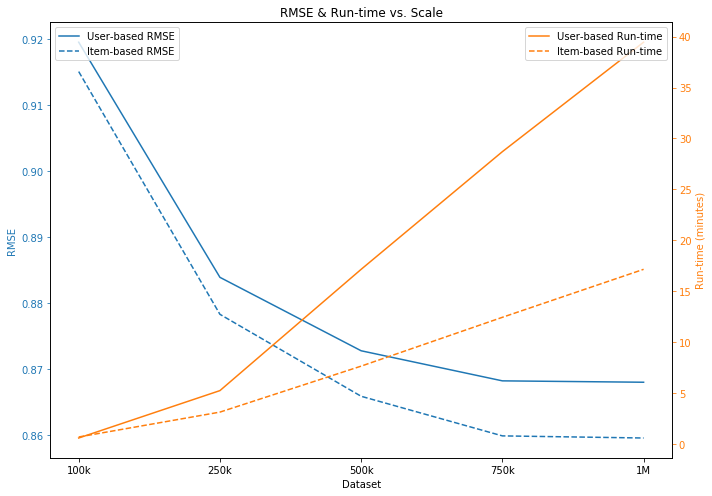

In [14]:
df = pd.read_csv("100k_to_1M_Results.csv")
user_based_df = df[(df["k"]==50) & (df["User-based?"]==True)]
print user_based_df
item_based_df = df[(df["k"]==50) & (df["User-based?"]==False)]
print item_based_df

x = [1,2,3,4,5]
dataset_sizes = user_based_df["Dataset"].tolist()
print dataset_sizes

linestyle = "--"
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.set_title("RMSE & Run-time vs. Scale")
line1 = ax1.plot(x, user_based_df["RMSE"], color="tab:blue")
line2 = ax1.plot(x, item_based_df["RMSE"], color="tab:blue", linestyle=linestyle)

ax1.set_xlabel("Dataset")
ax1.set_ylabel("RMSE", color='tab:blue')
ax1.tick_params("y", colors='tab:blue')

ax2 = ax1.twinx()
line3 = ax2.plot(x, user_based_df["Running_Time_Minutes"], color="tab:orange")
line4 = ax2.plot(x, item_based_df["Running_Time_Minutes"], color="tab:orange", linestyle = linestyle)
ax2.set_ylabel("Run-time (minutes)", color='tab:orange')
ax2.tick_params("y", colors='tab:orange')

ax1.legend(("User-based RMSE", "Item-based RMSE"), loc="upper left")
ax2.legend(("User-based Run-time", "Item-based Run-time"), loc="upper right")
fig.tight_layout()
plt.xticks(x, dataset_sizes)
plt.show()

The above graph shows the accuracy, runtime of user and item based algorithms with scale of the data set.
RMSE decreases as the scale of the dataset increases because the more data we have the better predictions we can make. The runtime of the algorithm increases as the scale of the data set increases. <br>

Our business goal is to predict movie ratings for a large user base and rating matrix. We observe that for the 1M ratings dataset (has 6000 users), the KNN Baseline algorithm takes about 40 min. <br>

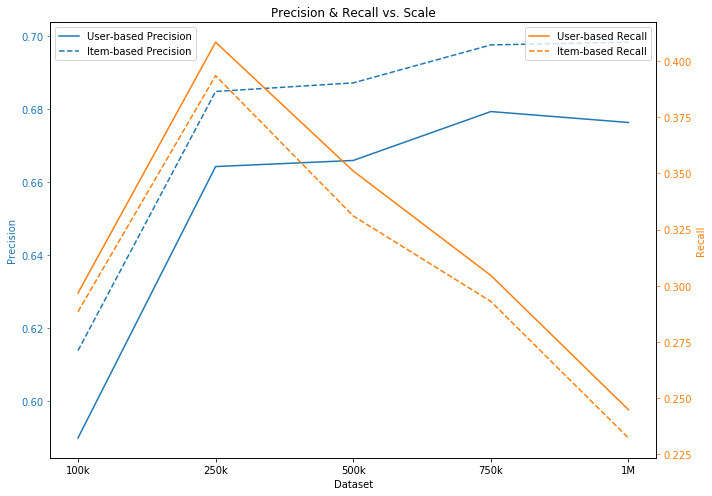

In [6]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.set_title("Precision & Recall vs. Scale")
line1 = ax1.plot(x, user_based_df["Precision"], color="tab:blue")
line2 = ax1.plot(x, item_based_df["Precision"], color="tab:blue", linestyle=linestyle)

ax1.set_xlabel("Dataset")
ax1.set_ylabel("Precision", color='tab:blue')
ax1.tick_params("y", colors='tab:blue')

ax2 = ax1.twinx()
line3 = ax2.plot(x, user_based_df["Recall"], color="tab:orange")
line4 = ax2.plot(x, item_based_df["Recall"], color="tab:orange", linestyle = linestyle)
ax2.set_ylabel("Recall", color='tab:orange')
ax2.tick_params("y", colors='tab:orange')

ax1.legend(("User-based Precision", "Item-based Precision"), loc="upper left")
ax2.legend(("User-based Recall", "Item-based Recall"), loc="upper right")
fig.tight_layout()
plt.xticks(x, dataset_sizes)
plt.show()

Note: As Scalability is an issue for memory based models, our business solution is to re-run the models every 24 hours instead of real time changes. So any interactions between a user and item for a given day will only be reflected in tomorrow’s model. We recalculate the matrix offline every 24 hours. <br>

The above graph shows the Precision and Recall vs Scale variation. Precision increases as the size of data set increases as we can make better predictions when there is more data. Recall decreases as the size of data set increases as the number of relevant recommendations increases, but the number of recommended movies does not increase as much. <br>

### Model-based:

### i) NMF
NMF is an algorithm based on Non-negative Matrix Factorization. It is similar to SVD, but ensures that user and item factors are kept positive. When baselines are considered, the prediction is defined as:
$$\hat{r}_{ui} = \mu + b_u + b_i + q_i^Tp_u$$

The optimization procedure is a regularized stochastic gradient descent, where the step size is specially chosen so user and item factors are positive, provided their initial values are also positive. At each iteration of SGD, the factors f or user u and item i are updated as follows:
$$\begin{split}p_{uf} &\leftarrow p_{uf} &\cdot \frac{\sum_{i \in I_u} q_{if}
\cdot r_{ui}}{\sum_{i \in I_u} q_{if} \cdot \hat{r_{ui}} +
\lambda_u |I_u| p_{uf}}\\
q_{if} &\leftarrow q_{if} &\cdot \frac{\sum_{u \in U_i} p_{uf}
\cdot r_{ui}}{\sum_{u \in U_i} p_{uf} \cdot \hat{r_{ui}} +
\lambda_i |U_i| q_{if}}\\\end{split}$$

$λ_u, λ_i$:regularization parameters



### ii)SVD
The prediction  of the SVD algorithm is defined as
$$\hat{r}_{ui} = \mu + b_u + b_i + q_i^Tp_u$$

We try to minimize the following regularized squared error:
$$\sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2\right)$$

Stochastic gradient descent is used to minimize the error: